# Laboratorium 13 Minimalizacja funkcji
### Autor: Krzysztof Hardek

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy import optimize as opt
import itertools
from matplotlib import animation
from IPython.display import HTML

### Zadanie 1 Problem komiwojażera
Funkcje tworzące zbiory punktów

In [2]:
def get_coordinate(normal, mu, sigma):
    if normal:
        return random.gauss(mu, sigma)
    
    return random.random()
    
def get_cloud(n, normal, groups, **kwargs):
    cloud = []
    
    mu = kwargs.get('mu')
    sigma = kwargs.get('sigma')
    
    x_shift = 1
    y_shift = 0
    
    for j in range(groups):
        for i in range(n):
            a = get_coordinate(normal, mu, sigma) + (3 * j) * x_shift
            b = get_coordinate(normal, mu, sigma) + (3 * j) * y_shift

            while (a, b) in cloud:  # prevent drawing existing points
                a = get_coordinate(normal, mu, sigma) + (3 * j) * x_shift
                b = get_coordinate(normal, mu, sigma) + (3 * j) * y_shift

            cloud.append((a, b))

        tmp_x = x_shift
        x_shift = y_shift
        y_shift = tmp_x ^ y_shift  # spreading groups across coordinate system

    return cloud

Algorytm rozwiązujący TSP

In [3]:
def get_next_path(path, arbitrary_swap):
    n = len(path)
    new_path = path[:]
    
    
    if  arbitrary_swap:
        first_point_index = random.randint(0, n - 1)
        second_point_index = random.randint(0, n - 1)

        while second_point_index == first_point_index:
            second_point_index = random.randint(0, n - 1)
    else:
        first_point_index = random.randint(0, n - 2)
        second_point_index = first_point_index + 1
    
    tmp_point = new_path[first_point_index]
    
    new_path[first_point_index] = new_path[second_point_index]
    new_path[second_point_index] = tmp_point
    
    return new_path

def distance(first_point, second_point):
    return ((first_point[0] - second_point[0]) ** 2 + (first_point[1] - second_point[1]) ** 2) ** 0.5

def energy(path):
    total_distance = 0
    prev_point = None
    
    for point in path:
        if prev_point:
            total_distance += distance(point, prev_point)
        
        prev_point = point
        
    total_distance += distance(path[0], path[len(path) - 1])
    
    return total_distance

def get_temperature(i, alpha, max_temperature):
    return max_temperature * (2 ** (alpha - 1) - 1) / ((1 + i) ** (alpha - 1) - 1)

def annealing(points, max_temperature, alpha, iterations, arbitrary_swap):
    path = points[:]
    random.shuffle(path)
    temperature = max_temperature
    
    for i in range(iterations):
        temperature = get_temperature(i+1, alpha, max_temperature)
        
        path_energy = energy(path)
        
        next_path = get_next_path(path, arbitrary_swap)
        next_path_energy = energy(next_path)
        
        energy_delta = path_energy - next_path_energy  
        
        if energy_delta > 0:
            path = next_path
        elif np.e ** (energy_delta/temperature) > random.random():
            path = next_path
            
    return path

Funkcja służąca do wizualizacji

In [4]:
def visualize(cloud, solution):
    x_cloud, y_cloud = zip(*cloud)
    plt.scatter(x_cloud, y_cloud, s=10, color='c')
    
    x_solution, y_solution = zip(*solution)
    plt.plot(x_solution, y_solution, color='r', alpha=0.5)
    
    plt.show()

### a) Wizualizacja rozwiązania
Parametry

In [5]:
max_iterations = 10000
max_temperature = 3000
alpha = 2.62

#### Rozkład jednostajny
n = 10

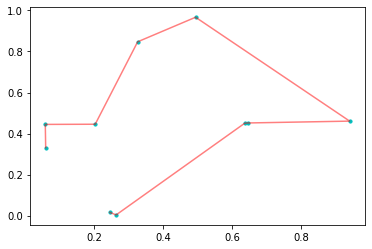

In [6]:
uniform_cloud = get_cloud(10, False, 1)
uniform_solution = annealing(uniform_cloud, max_temperature, alpha, max_iterations, True)
visualize(uniform_cloud, uniform_solution)

n = 20

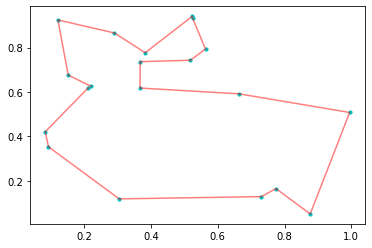

In [7]:
uniform_cloud2 = get_cloud(20, False, 1)
uniform_solution2 = annealing(uniform_cloud2, max_temperature, alpha, max_iterations, True)
visualize(uniform_cloud2, uniform_solution2)

n = 50

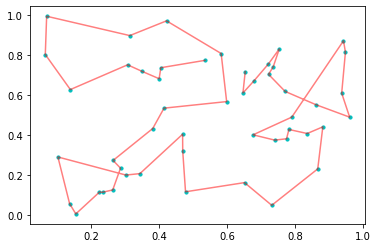

In [8]:
uniform_cloud3 = get_cloud(50, False, 1)
uniform_solution3 = annealing(uniform_cloud3, max_temperature, alpha, max_iterations, True)
visualize(uniform_cloud3, uniform_solution3)

#### Rozkład normalny
n = 10, różne grupy parametrów

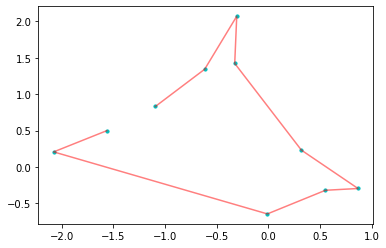

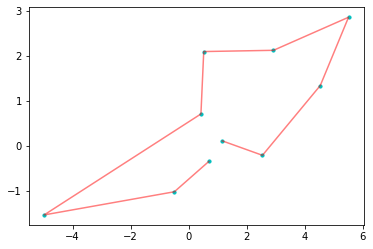

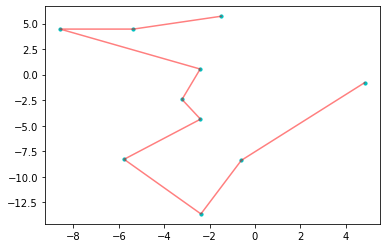

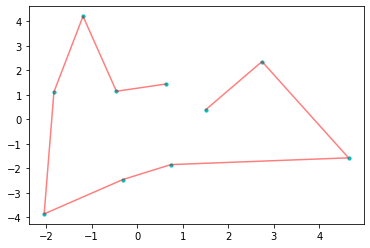

In [9]:
normal_cloud = get_cloud(10, True, 1, mu=0, sigma = 1)
normal_solution = annealing(normal_cloud, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud, normal_solution)

normal_cloud = get_cloud(10, True, 1, mu=1, sigma = 2)
normal_solution = annealing(normal_cloud, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud, normal_solution)

normal_cloud = get_cloud(10, True, 1, mu=0, sigma = 4)
normal_solution = annealing(normal_cloud, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud, normal_solution)

normal_cloud = get_cloud(10, True, 1, mu=1, sigma = 3)
normal_solution = annealing(normal_cloud, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud, normal_solution)

n = 20

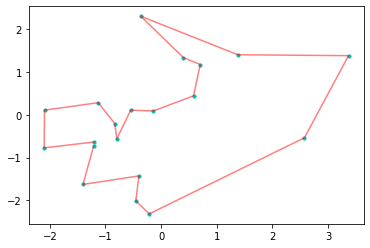

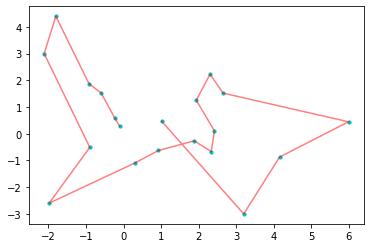

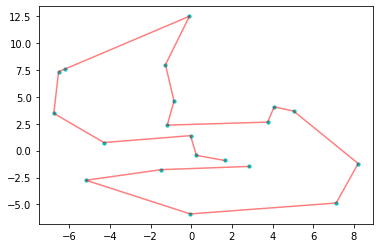

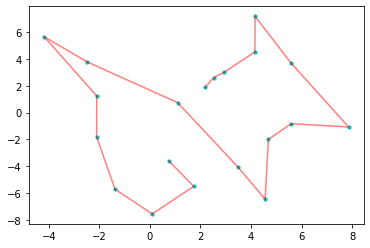

In [10]:
normal_cloud1 = get_cloud(20, True, 1, mu=0, sigma = 1)
normal_solution1 = annealing(normal_cloud1, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud1, normal_solution1)

normal_cloud1 = get_cloud(20, True, 1, mu=1, sigma = 2)
normal_solution1 = annealing(normal_cloud1, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud1, normal_solution1)

normal_cloud1 = get_cloud(20, True, 1, mu=0, sigma = 4)
normal_solution1 = annealing(normal_cloud1, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud1, normal_solution1)

normal_cloud1 = get_cloud(20, True, 1, mu=1, sigma = 3)
normal_solution1 = annealing(normal_cloud1, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud1, normal_solution1)

n = 50

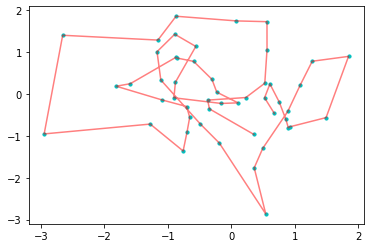

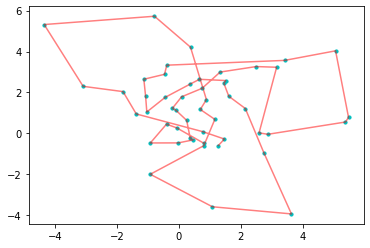

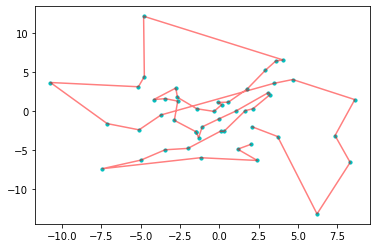

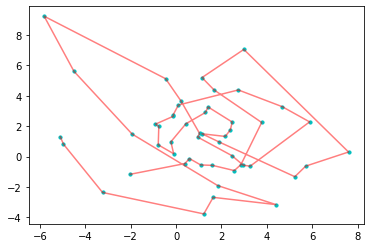

In [11]:
normal_cloud2 = get_cloud(50, True, 1, mu=0, sigma = 1)
normal_solution2 = annealing(normal_cloud2, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud2, normal_solution2)

normal_cloud2 = get_cloud(50, True, 1, mu=1, sigma = 2)
normal_solution2 = annealing(normal_cloud2, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud2, normal_solution2)

normal_cloud2 = get_cloud(50, True, 1, mu=0, sigma = 4)
normal_solution2 = annealing(normal_cloud2, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud2, normal_solution2)

normal_cloud2 = get_cloud(50, True, 1, mu=1, sigma = 3)
normal_solution2 = annealing(normal_cloud2, max_temperature, alpha, max_iterations, True)
visualize(normal_cloud2, normal_solution2)

#### Dziewięć odseparowanych grup
n = 18

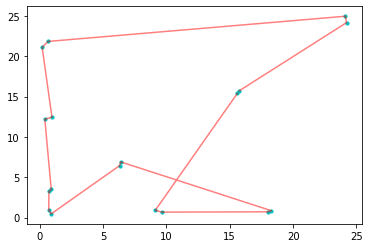

In [12]:
group_cloud = get_cloud(2, False, 9)
group_solution = annealing(group_cloud, max_temperature, alpha, max_iterations, True)
visualize(group_cloud, group_solution)

n = 36

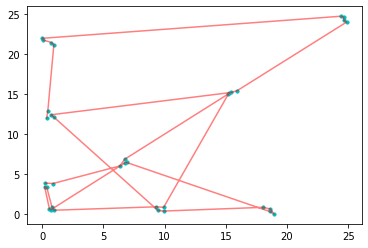

In [13]:
group_cloud2 = get_cloud(4, False, 9)
group_solution2 = annealing(group_cloud2, max_temperature, alpha, max_iterations, True)
visualize(group_cloud2, group_solution2)

n = 54

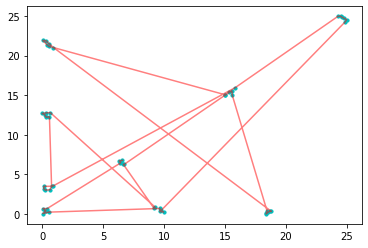

In [14]:
group_cloud3 = get_cloud(6, False, 9)
group_solution3 = annealing(group_cloud3, max_temperature, alpha, max_iterations, True)
visualize(group_cloud3, group_solution3)

#### Wnioski
Algorytm, zwłaszcza dla małej liczby punktów, zwraca bardzo dobre rozwiązania. Dla większych liczby punktów otrzymane cykle również wydają się być sensowne. W przypadku dziewięciu różnych grup, nasuwającym się rozwiązaniem jest najpierw przejście przez wszystkie punkty w grupie a potem zajęcie się następną grupą. Algorytm generuje podobnie zachowujące się rozwiązanie. 

### b) Wpływ początkowej wartości temperatury oraz sposobu generowania sąsiedniego stanu na zbieżność procesu optymalizacji
Do przetestowania wpływu tych parametrów wybrałem jedną grupę punktów z poprzedniego zadania, która wydaję mi się być dosyć reprezentatywna

In [15]:
test_cloud = get_cloud(50, False, 1)

#### Arbitrary swap
temperatura 30

9.288701599996479


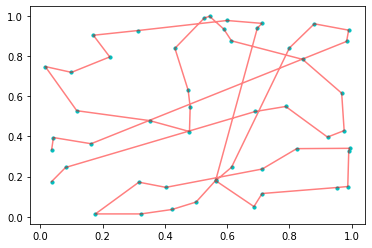

In [16]:
test_solution30 = annealing(test_cloud, 30, alpha, max_iterations, True)
print(energy(test_solution30))
visualize(test_cloud, test_solution30)

temperatura 3000

7.6468536668171785


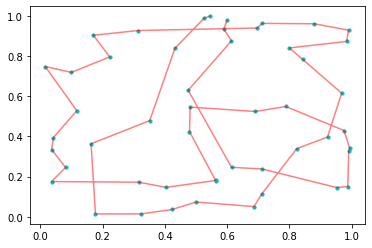

In [17]:
test_solution3000 = annealing(test_cloud, 3000, alpha, max_iterations, True)
print(energy(test_solution3000))
visualize(test_cloud, test_solution3000)

temperatura 5000

8.950943256181445


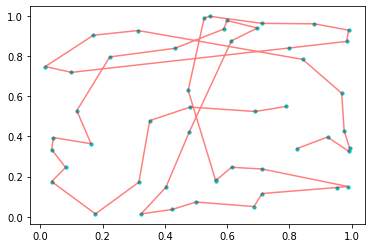

In [18]:
test_solution5000 = annealing(test_cloud, 5000, alpha, max_iterations, True)
print(energy(test_solution5000))
visualize(test_cloud, test_solution5000)

#### Consutive swap
temperatura 30

22.283244867925102


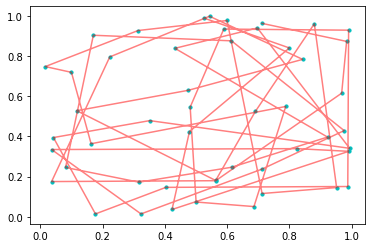

In [19]:
test_solution30 = annealing(test_cloud, 30, alpha, max_iterations, False)
print(energy(test_solution30))
visualize(test_cloud, test_solution30)

temperatura 3000

18.535997399702598


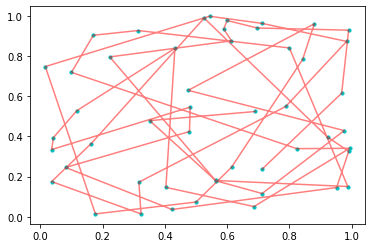

In [20]:
test_solution3000 = annealing(test_cloud, 3000, alpha, max_iterations, False)
print(energy(test_solution3000))
visualize(test_cloud, test_solution3000)

temperatura 5000

20.064700975288034


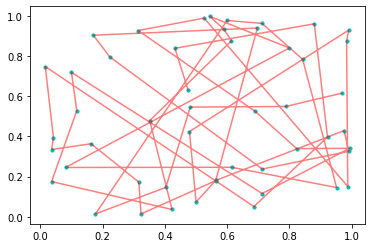

In [29]:
test_solution5000 = annealing(test_cloud, 5000, alpha, max_iterations, False)
print(energy(test_solution5000))
visualize(test_cloud, test_solution5000)

#### Wnioski


Z analizy algorytmu wynika że podanie większej temperatury do funkcji spowoduje że będzie większa tendencja do akceptowania gorszych rozwiązań, co może pomóc, gdy często się wpada w lokalne minima. Testowe zbiory punktów nie wydają się reagować zbyt mocno na różne temperatury początkowe, niemniej jednak bardzo często temperatura 3000 (zarówno dla consecutive jak i arbitrary swap) daje najlepsze rezultaty. Korzystająć z Simulated annealing musimy do każdego problemu indywidualnie, w empiryczny sposób, dobrać temperature początkową. Jeśli chodzi o sposób generowania stanu sąsiedniego to zdecydowaną przewagę ma arbitrary swap. Spodziewałem się odwrotnych rezultatów, ponieważ gdy jesteśmy w stanie o niskiej "energii" to zamiana dwóch losowych wierzchołków ma raczej większą szansę żeby tą energie zwiększyć niż zmniejszyć w stosunku do zmiany dwóch sąsiednich wierzchołków. Spowodowane to może być relatywnie małą liczbą punktów w grupie, którą testuje oraz dużą liczbą iteracji. 

### c) Wizualizacja działania procedury minimalizującej funkcje celu 
Skorzystam z funkcji Rastingina, służącej do testowania algorytmów optymalizacyjnych, która posiada bardzo dużo minimów lokalnych.  
  
#### Wykonanie procedury minimaluzującej funkcje celu, oraz zapisanie punktów, które odwiedziła

In [22]:
points = []
min_points = []

arg_min = -5.12
arg_max = 5.12

def min_save(x, e, context):
    min_points.append(x[0])

def rastingin(x):
    return np.sum(x * x - 10*np.cos(2* np.pi * x)) + 10 * np.size(x)
    
def rastingin_call(x):
    points.append(x[0])
    return np.sum(x * x - 10*np.cos(2* np.pi * x)) + 10 * np.size(x)

solution = opt.dual_annealing(rastingin_call, bounds=[(arg_min, arg_max)], callback=min_save, maxiter=100)

#### Podstawowa konfiguracja wykresu

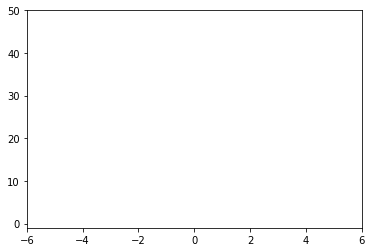

In [23]:
fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-1, 50))

line, = ax.plot([], [], lw=2, color='r')
func, = ax.plot([], [], lw=2, color='c')
min_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

#### Tworzenie animacji
Czerwona linia na animacji pokazuje aktualny punkt, w którym znajduje się funkcja. Jeżeli na trafi na jakieś minimum to  w lewym górnym rogu pokaże się napis "MINIMUM"

In [24]:
def init():
    line.set_data([], [])
    func.set_data([], [])
    min_text.set_text("")
    return line, func, min_text

In [25]:
def animate(i):
    xfunc = np.linspace(-5.12, 5.12, 1000)
    yfunc = [rastingin(xfunc[i]) for i in range(1000)]
    
    xline = [points[i]]
    yline = np.linspace(-1, rastingin(points[i]), 100)
    
    
    if points[i] in min_points:
        min_text.set_text("MINIMUM")
    else:
        min_text.set_text("")
    
    line.set_data(xline, yline)
    func.set_data(xfunc, yfunc)
    
    return line, func, min_text

In [26]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(points), interval=200, blit=True)

Generowanie filmu

In [27]:
HTML(anim.to_html5_video())

In [28]:
print(solution.x, solution.fun)

[-5.27883763e-09] 5.329070518200751e-15


#### Wnioski
Na filmie widać że funkcja kilka razy znajduje lokalne minima, ale się w nich nie zatrzymuje i szuka dalej. Ostatecznie trafia bardzo blisko rzeczywistemu minimum globalnemu czyli (0, 0).